### 1. В результате эксперимента получены данные приведенные в таблице 1

In [237]:
from matplotlib import pyplot as plt
import numpy as np

alpha_1 = 0.01
a = 0.00
b = 1.19
lambda_0 = 2.00
lambda_1 = 0.50
array = [0, 0, 1, 2, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
         0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
         0, 0, 3, 0, 0, 1, 1, 1, 0, 1,
         0, 3, 0, 0, 0, 1, 0, 0, 1, 2]

#### a) Построить вариационный ряд. эмпирическую функцию распределения и гистограмму частот.

Вариационный ряд

In [238]:
array.sort()
print(*array, sep=", ")

0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3


Эмпирическая функция

In [239]:
print("0 - ", array.count(0)/len(array), f"(Количество {array.count(0)})")
print("1 - ", array.count(1)/len(array), f"(Количество {array.count(1)})")
print("2 - ", array.count(2)/len(array), f"(Количество {array.count(2)})")
print("3 - ", array.count(3)/len(array), f"(Количество {array.count(3)})")

0 -  0.62 (Количество 31)
1 -  0.3 (Количество 15)
2 -  0.04 (Количество 2)
3 -  0.04 (Количество 2)


\begin{equation*}
F_n(x)=\frac{1}{n} \sum_{i=1}^{n}(\textbf{1}_{\{ x_i < x\}})=
        \begin{cases}
                0 & x \in (-\infty, 0]\\
                0.62 &  x \in (0, 1]\\
                0.92 &  x \in (1, 2]\\
                0.96 &  x \in (2, 3]\\
                1 &  x \in (3, +\infty)
	\end{cases}
\end{equation*}

Гистрограмма частот
Пусть длинна 4 и шаг равен 1, тогда получим следующие $I_i$
$\\I_1 = [0, 1)\\
I_2 = [1, 2)\\
I_3 = [2, 3)\\
I_4 = [3, 4]\Rightarrow\\
h = 1, n = 50\\
H(I_i) = \frac{\# \{ x_j: x_j \in I_i\}}{h\cdot n}\\
H(I_1) = \frac{31}{50 \cdot 1} = 0.62\\
H(I_2) = \frac{15}{50 \cdot 1} = 0.3\\
H(I_3) = \frac{2}{50 \cdot 1} = 0.04\\
H(I_4) = \frac{2}{50 \cdot 1} = 0.04\\
$

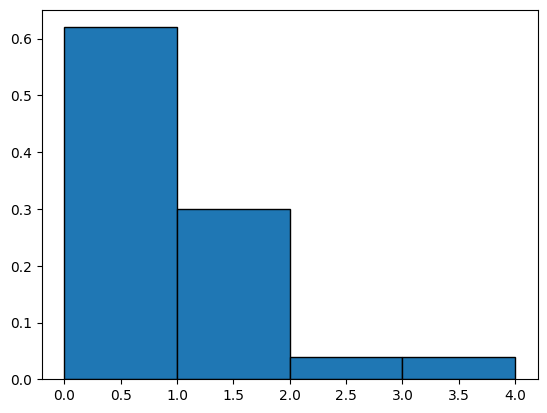

In [240]:
xdata = [i + 1/2 for i in range(4)]
ydata = [0.62, 0.3, 0.04, 0.04]

plt.bar(xdata, ydata, width=1, edgecolor='k')
plt.show()

#### b) Вычислить выборочные аналоги следующих числовых характер истик: (i) математического ожидания, (ii) дисперсии, (iii) медианы, (iv) асимметрии, (v) эксцесса, (vi) вероятности Pr($X \in [a, b]$).

Вычислим выборочный аналог мат. ожидания

In [241]:
sum = 0

for i in array:
    sum += i

average_x = sum/len(array)
print("average =", average_x)

average = 0.5


$\bar x = \frac{1}{n} \sum_{i=1}^{n}(x_i)=0.5$

Вычислим выборочный аналог дисперисии

In [242]:
sum = 0

for i in array:
    sum += (i - average_x)**2

dispersion = sum/len(array)

print("S^2 =", sum/len(array))

S^2 = 0.57


$S^2 = \frac{1}{n} \sum_{i=1}^{n}( (x_i - \bar x)^2 )=0.57$

Вычислим медиану

так как размер выборки четный, то медианой будет среднее значение двух центральных элементов в отсортированном ряде

$M_x = \cfrac{0 + 0}{2} = 0$

Коэффициент асимметрии

$\Alpha = \frac{\mu_3}{(S^2)^3}\\
\mu = \frac{1}{n} \sum_{i=1}^{n}( (x_i - \bar x)^3 )
$


In [243]:
def make_mu(t):
    mu = 0

    for i in array:
        mu += (i - average_x)**t

    mu /= len(array)

    return mu

In [244]:
A = make_mu(3)/(dispersion**(3/2))

print("A =", round(A, 4))

A = 1.6731


Коэффициент эксцесса
$
\varepsilon = \frac{\mu_4}{(S)^4} - 3\\
$

In [245]:
eps = make_mu(4)/(dispersion**(4/2)) - 3

print("Eps =", round(eps, 4))

Eps = 2.6094


Найдем вероятность $Pr(x \in [a, b])$

$Pr(x \in [0, 1.19])=F(1.19)-F(0)=\frac{31+15}{50}=0.92$


#### c) В предположении, что исходные наблюдения являются выборкой из распределения Пуассона, построить оценку максимального правдоподобия параметра $\lambda$, а также оценку $\lambda$ по методу моментов.

Функция максимального правдоподобия
$L(\vec{x}, \theta)=\prod_{i=1}^{n}f(x_i, \theta)$

Так как функция распределения Пуассона дискретная, то $f(x_i, \theta) = P(x=x_i) = f(x_i, \lambda) = \frac{\lambda^{x_i}}{x_i !}e^{-\lambda}$

$L(\vec{x}, \lambda)=\prod_{i=1}^{n}\frac{\lambda^{x_i}}{x_i !}e^{-\lambda}$

Прологарифмируем функцию

$LL(\vec{x}, \lambda)=\sum_{i=1}^{n}\ln(\frac{\lambda^{x_i}}{x_i !}e^{-\lambda})=\ln(\lambda) \cdot \sum_{i=1}^{n}x_i - \sum_{i=1}^{n}\ln(x_i!) - n\lambda$

Найдем точку масимума 

$\frac{dLL}{d\lambda} = \cfrac{\sum_{i=1}^{n}x_i}{\lambda}-n\\
\cfrac{d^2LL}{d\lambda^2}=-\lambda^{-2}\sum_{i=1}^{n}x_i < 0 \Rightarrow \widehat \lambda=\bar x = 0.5$

Найдем оценку $\lambda$ по методу моменту моментов

$Ex_1 = \sum_{k=0}^\infty k \cdot \frac{\lambda^{x_i}}{x_i !}e^{-\lambda}= \lambda\\
\widehat{\lambda} = \bar x = 0.5$

#### d) Построить асимптотический доверительный интервал уровня значимости $\alpha_1$ для параметра $\lambda$ на базе оценки максимального правдоподобия.

Найдем функцию $G(x, \lambda)$ - генератор доверительного интервала. $Ex_1=\bar x, \Rightarrow$

$\sqrt{n} \cdot \frac{\bar x - \lambda}{\sqrt{\lambda}}\sim N(0, 1)$, так как $\widehat \lambda=\bar x \Rightarrow$

$\sqrt{n} \cdot \frac{\bar x - \lambda}{\sqrt{\bar x}}$

$P_\theta(x_{1\alpha_1} \le \sqrt{n} \cdot \frac{\bar x - \lambda}{\sqrt{\bar x}} \le x_{2\alpha_1}) \rightarrow 1 - \alpha_1$

Найдем $x_{1\alpha_1}$ и $x_{2\alpha_1}$

$\Phi(x_{\alpha_1}) = 1-\cfrac{\alpha_1}{2} = 1-\cfrac{0.01}{2} = 0.995$, по таблице значений функции Лапласаа $x_{\alpha_1}=2.81 \Rightarrow$

$P_\theta(-2.81 \le \sqrt{n} \cdot \frac{\bar x - \lambda}{\sqrt{\bar x}} \le 2.81)$, тогда получим интервал

$-\lambda \in [-2,81\frac{\sqrt{\bar x}}{\sqrt{n}}-\bar x; \; 2,81\frac{\sqrt{\bar x}}{\sqrt{n}}-\bar x]$

$\lambda \in [\bar x-2,81\frac{\sqrt{\bar x}}{\sqrt{n}}; \; \bar x + 2,81\frac{\sqrt{\bar x}}{\sqrt{n}}]$

$[0.5-2,81\frac{\sqrt{0.5}}{\sqrt{50}}; \; 0.5 + 2,81\frac{\sqrt{0.5}}{\sqrt{50}}]$

$[0.219; \; 0.781]$
